# Task - 1 Data preparation and customer analytics

### Author : Siddharth Patondikar

### Objective

We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.  

To get started, download the resource csv data files below and begin performing high level data checks such as:

- Creating and interpreting high level summaries of the data
- Finding outliers and removing these (if applicable)
- Checking data formats and correcting (if applicable)

You will also want to derive extra features such as pack size and brand name from the data and define metrics of interest to enable you to draw insights on who spends on chips and what drives spends for each customer segment. Remember our end goal is to form a strategy based on the findings to provide a clear recommendation to Julia the Category Manager so make sure your insights can have a commercial application.

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing Data

transact_df = pd.read_excel('QVI_transaction_data.xlsx', sheet_name='in')

purchase_df = pd.read_csv('QVI_purchase_behaviour.csv')

In [ ]:
#First look for transaction data
transact_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
#Total rows and cols
transact_df.shape

(264836, 8)

Data has 264836 rows and 8 columns

In [ ]:
transact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [ ]:
#Checking duplicate values
transact_df.duplicated().value_counts()

False    264835
True          1
dtype: int64

There is one duplicate row in the data, hence dropping that row

In [ ]:
#Dropping duplicates
transact_df.drop_duplicates(inplace=True)
transact_df.shape

(264835, 8)

In [ ]:
#Checking Null values
transact_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

There are no null values in the data.

<Axes: >

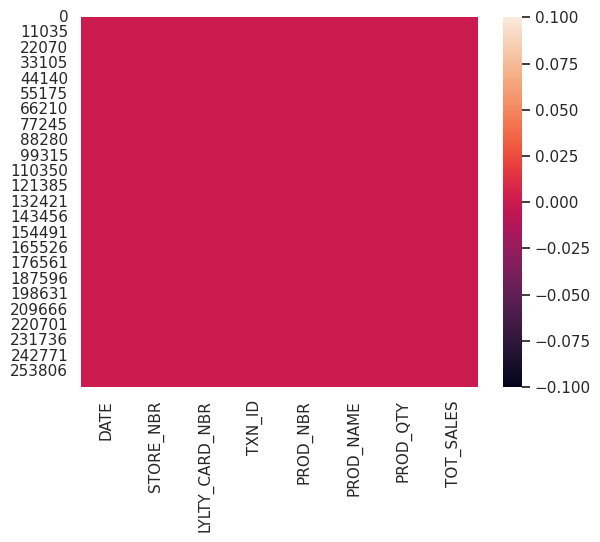

In [ ]:
sns.heatmap(transact_df.isnull())

In [ ]:
transact_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264835.000000,264835.000000,2.648350e+05,2.648350e+05,264835.000000,264835.000000,264835.000000
mean,43464.036600,135.080216,1.355496e+05,1.351584e+05,56.583201,1.907308,7.304205
std,105.389336,76.784306,8.058011e+04,7.813316e+04,32.826692,0.643655,3.083231
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.000000,7.002100e+04,6.760100e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.000000,1.303580e+05,1.351380e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030945e+05,2.027015e+05,85.000000,2.000000,9.200000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [ ]:
#Checking unique values in all the columns
for col in transact_df.columns.tolist():
  print(f'Unique values in {col} is : {transact_df[col].nunique()}')

Unique values in DATE is : 364
Unique values in STORE_NBR is : 272
Unique values in LYLTY_CARD_NBR is : 72637
Unique values in TXN_ID is : 263127
Unique values in PROD_NBR is : 114
Unique values in PROD_NAME is : 114
Unique values in PROD_QTY is : 6
Unique values in TOT_SALES is : 112


In [ ]:
#Converting DATE column to date format
transact_df['DATE'] = pd.to_datetime(transact_df['DATE'], origin='1899-12-30', unit='D').dt.strftime('%Y-%m-%d')

In [ ]:
transact_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
#Checking PROD_NAME columns
transact_df['PROD_NAME'].describe()

count                                     264835
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [ ]:

split_prods = transact_df["PROD_NAME"].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]',' ').str.split()
split_prods

0                  [Natural, Chip, Compny, SeaSalt]
1                              [CCs, Nacho, Cheese]
2            [Smiths, Crinkle, Cut, Chips, Chicken]
3           [Smiths, Chip, Thinly, S, Cream, Onion]
4         [Kettle, Tortilla, ChpsHny, Jlpno, Chili]
                            ...                    
264831    [Kettle, Sweet, Chilli, And, Sour, Cream]
264832                 [Tostitos, Splash, Of, Lime]
264833                          [Doritos, Mexicana]
264834     [Doritos, Corn, Chip, Mexican, Jalapeno]
264835                 [Tostitos, Splash, Of, Lime]
Name: PROD_NAME, Length: 264835, dtype: object

In [ ]:
word_counts = {}
def count_words(line):
  for word in line:
    if word not in word_counts:
      word_counts[word] = 1
    else:
      word_counts[word] += 1
split_prods.apply(lambda line: count_words(line))
print(pd.Series(word_counts).sort_values(ascending = False))

Chips       49770
Kettle      41288
Smiths      28859
Salt        27976
Cheese      27890
            ...  
Sunbites     1432
Pc           1431
Garden       1419
NCC          1419
Fries        1418
Length: 198, dtype: int64


In [ ]:
#Getting Brand Names for products
def get_brand_name(x):
  brand = x.split(' ')[0]
  if brand == "Dorito":
        return "Doritos"
  elif brand == "GrnWves" or brand == "Grain":
        return "Grain Waves"
  elif brand == "Infzns":
        return "Infuzions"
  elif brand == "Natural" or brand == "NCC":
        return "Natural Chip Co"
  elif brand == "Red":
        return "RRD"
  elif brand == "Smith":
        return "Smiths"
  elif brand == "Snbts":
        return "Sunbites"
  elif brand == "WW":
        return "Woolworths"
  else:
        return brand

transact_df['Brand_name'] = transact_df['PROD_NAME'].apply(get_brand_name)

In [ ]:
#Getting Packs size for products
def get_pack_size(x):
  lst = x.split(' ')
  size = lst[-1]
  size = size[-4:-1]
  return size

transact_df['Pack_size'] = transact_df["PROD_NAME"].apply(get_pack_size)

In [ ]:
transact_df['Pack_size'].value_counts()

175    66389
150    43131
134    25102
110    22387
170    19983
165    15297
300    15166
330    12540
380     6418
270     6285
210     6272
200     4473
Sal     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: Pack_size, dtype: int64

In [ ]:
transact_df[transact_df['Pack_size']=='Sal'].head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand_name,Pack_size
65,2019-05-20,83,83008,82099,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,Sal
153,2019-05-17,208,208139,206906,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Kettle,Sal
174,2018-08-20,237,237227,241132,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,Sal
177,2019-05-17,243,243070,246706,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Kettle,Sal
348,2018-10-26,7,7077,6604,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Kettle,Sal


Some pack size are named to 'Sal' this is because in the product name, the pack size occur in the beginning rather than end. Hence, changing the pack size

In [ ]:
transact_df['Pack_size'] = transact_df['Pack_size'].apply(lambda x: 135 if x=='Sal' else int(x))

In [ ]:
transact_df['Pack_size'].value_counts()

175    66389
150    43131
134    25102
110    22387
170    19983
165    15297
300    15166
330    12540
380     6418
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: Pack_size, dtype: int64

In [ ]:
transact_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand_name,Pack_size
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Co,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150


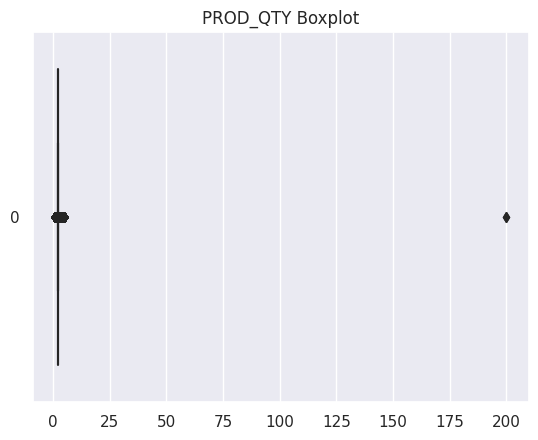

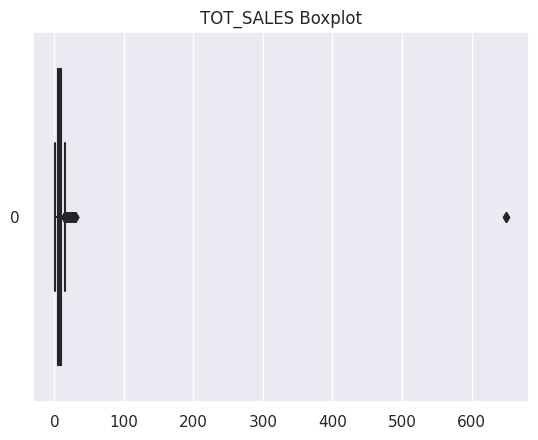

In [ ]:
num = ['PROD_QTY','TOT_SALES']


#Checking outliers
for col in num:
  sns.boxplot(transact_df[col], color='teal', orient='h')
  plt.title(f'{col} Boxplot')
  plt.show()

From the above boxplots we can see, the following columns have outliers:
- Product Qty = 200
- Total Sales = 650

In [ ]:
transact_df[transact_df['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand_name,Pack_size
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,Doritos,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,Doritos,380


There are two outliers in product quantity, both are same product and  bought by the same customer.

In [ ]:
transact_df[transact_df['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand_name,Pack_size
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,Doritos,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,Doritos,380


After checking all the transactions, this customer has made only two transactions, hence we will remove these outliers

In [ ]:
#Filter out the above customer
transact_df = transact_df[transact_df['LYLTY_CARD_NBR']!=226000]

In [ ]:
#Checking transactions by date
print(transact_df['DATE'].nunique())

364


In [ ]:
start_date = '2018-07-01'
end_date = '2019-06-30'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Find the missing date
missing_dates = pd.Series(date_range[~date_range.isin(transact_df['DATE'])])

print("Missing date:", missing_dates)

Missing date: 0   2018-12-25
dtype: datetime64[ns]


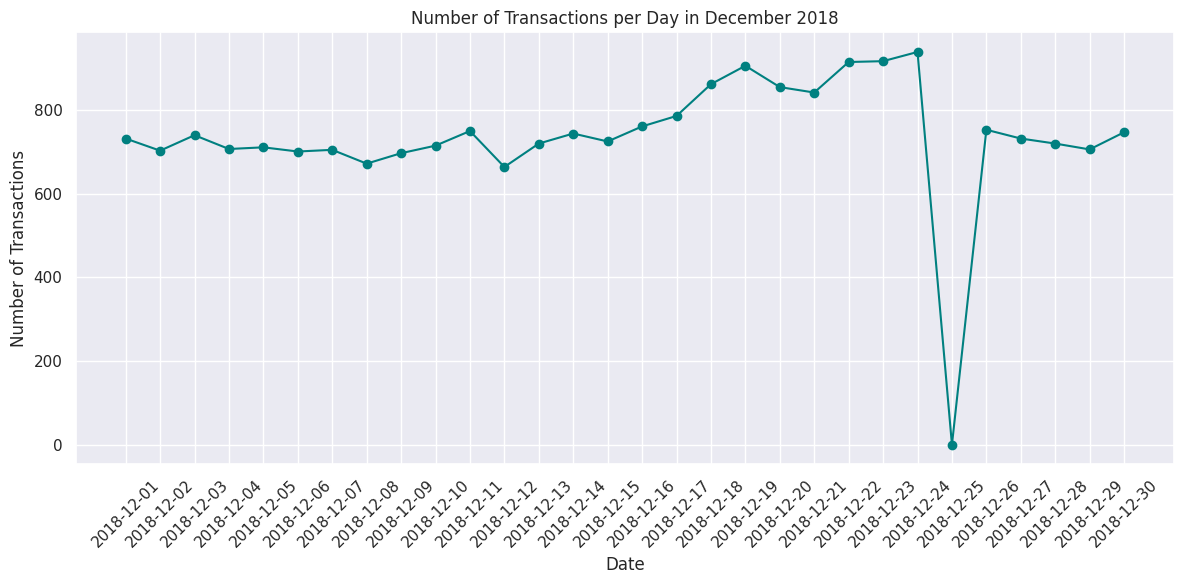

In [ ]:
start_date = '2018-12-01'
end_date = '2018-12-30'
date_range_november = pd.date_range(start=start_date, end=end_date, freq='D')
dec_data = transact_df[(transact_df['DATE'] >= start_date) & (transact_df['DATE'] <= end_date)]

# Count the occurrences of each date in December 2018
transactions_per_day_dec = pd.DataFrame(dec_data['DATE'].value_counts()).reset_index().rename(columns={'index':'Date','DATE':'count'})
new_row = {'Date': '2018-12-25', 'count': 0}
transactions_per_day_dec = transactions_per_day_dec.append(new_row, ignore_index=True)
transactions_per_day_dec.sort_values('Date',inplace=True)

# Sort the dates in ascending order
#transactions_per_day_dec = transactions_per_day_dec.sort_index()

# Plot the line plot
plt.figure(figsize=(12, 6))
plt.plot(transactions_per_day_dec['Date'], transactions_per_day_dec['count'], marker='o',color='teal')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Day in December 2018')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

Sales are increasing in the lead up to christmas, but there are no sales on christmas day itself as the shops are closed.

Text(0.5, 1.0, 'Distribution of pack size in grams')

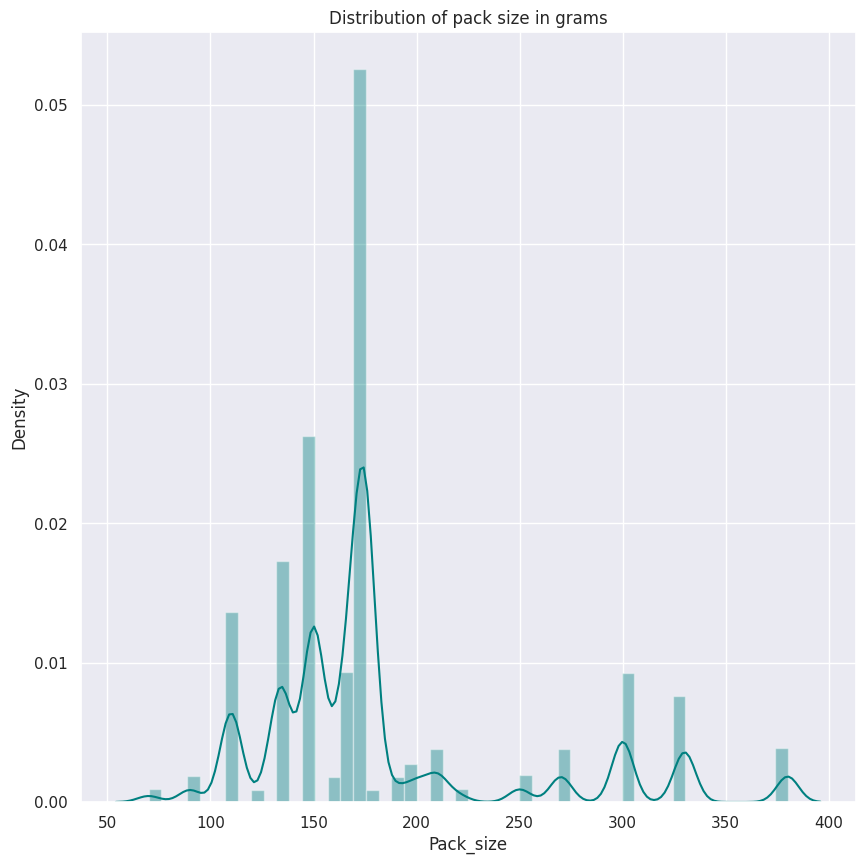

In [ ]:
#Checking distribution of pack size
plt.figure(figsize=(10,10))
sns.distplot(transact_df['Pack_size'],color='teal')
plt.title('Distribution of pack size in grams')

Most of the pack size are between 150g and 200g

Text(0.5, 1.0, 'Brands with most products sold')

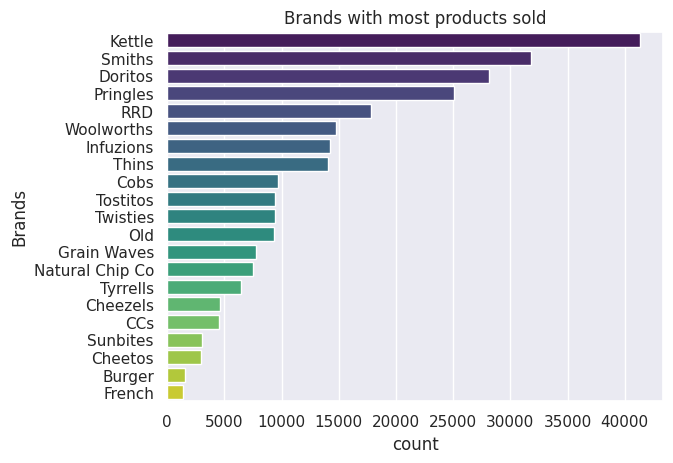

In [ ]:
#Checking Brand Names
brand = pd.DataFrame(transact_df['Brand_name'].value_counts()).reset_index().rename(columns = {'index':'Brands','Brand_name':'count'})

sns.barplot(data=brand,y='Brands',x='count',palette='viridis')
plt.title('Brands with most products sold')

Kettle brand has had most number of transactions, hence most number of chips are sold by Kettle.

###Checking purchase behaviour data

In [ ]:
#Checking purchase behaviour dataframe
purchase_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
purchase_df.shape

(72637, 3)

In [ ]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
purchase_df.duplicated().value_counts()

False    72637
dtype: int64

In [ ]:
purchase_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

There are no duplicates or null values in purchase behaviour data.

In [ ]:
print(transact_df['LYLTY_CARD_NBR'].nunique())
print(purchase_df['LYLTY_CARD_NBR'].nunique())

72636
72637


### Merging both dataset

In [ ]:
cust_df = pd.merge(transact_df,purchase_df, on='LYLTY_CARD_NBR',how='left')

In [ ]:
cust_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand_name,Pack_size,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Co,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150,MIDAGE SINGLES/COUPLES,Budget


Text(0.5, 1.0, 'Total Sales for Lifestage')

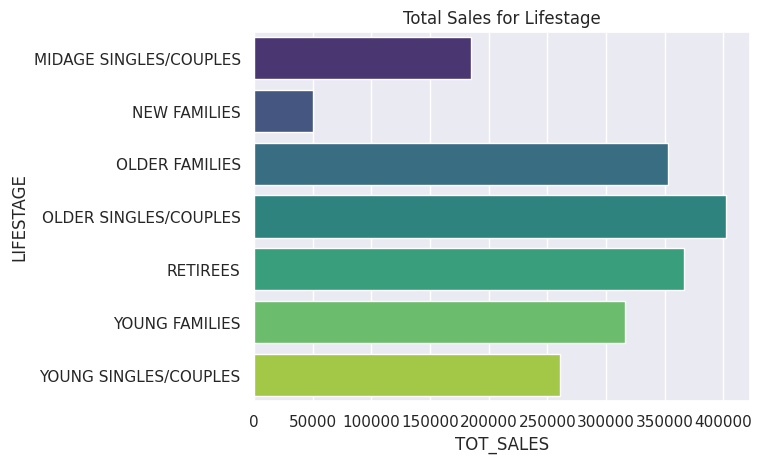

In [ ]:
#Checking total sales per lifestage
life_df = cust_df.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()

#Plotting total sales per lifestage
sns.barplot(data=life_df,x='TOT_SALES',y='LIFESTAGE',palette='viridis')
plt.title('Total Sales for Lifestage')

Older singles/couples have the most sales.

Text(0.5, 1.0, 'Purchase Behaviour for Older Singles/Couples')

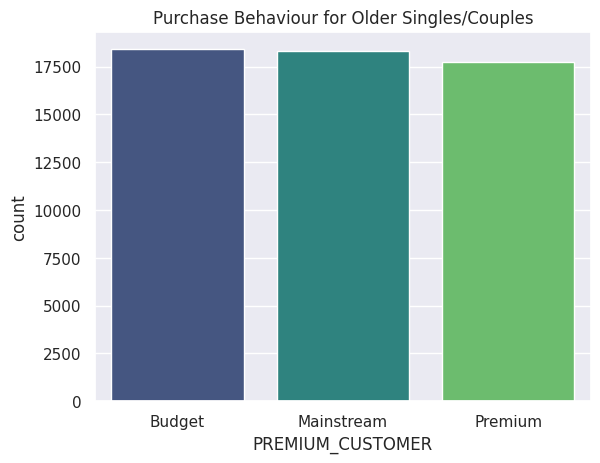

In [ ]:
#Checking purchasing behaviour of older singles/couples
old_df = cust_df[cust_df['LIFESTAGE']=='OLDER SINGLES/COUPLES']

sns.countplot(data = old_df, x='PREMIUM_CUSTOMER',palette='viridis')
plt.title('Purchase Behaviour for Older Singles/Couples')

The budget, mainstream and premium customer for older singles/couples are almost equal.

Text(0, 0.5, 'Number of customers')

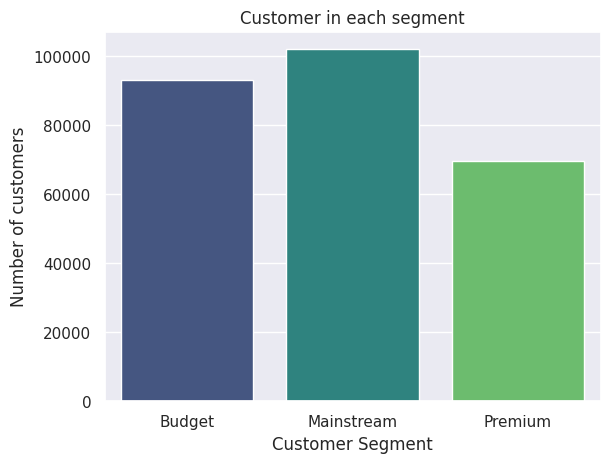

In [ ]:
cust_segment = cust_df.groupby('PREMIUM_CUSTOMER')['LYLTY_CARD_NBR'].count().reset_index()

#Plotting total customers in each customer segment
sns.barplot(data=cust_segment, x='PREMIUM_CUSTOMER',y='LYLTY_CARD_NBR',palette='viridis')
plt.title('Customer in each segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of customers')

There are most customers in mainstream segment, followed by budget and premium.

In [ ]:
#Checking how many chips are bought per customer by segment

cust_seg2 = cust_df.groupby('PREMIUM_CUSTOMER')['PROD_QTY'].sum().reset_index()

cust_segment = cust_segment.merge(cust_seg2, on='PREMIUM_CUSTOMER',how='left')

cust_segment

,PREMIUM_CUSTOMER,LYLTY_CARD_NBR,PROD_QTY
0,Budget,93157,177898
1,Mainstream,101988,193965
2,Premium,69688,132859


Text(0, 0.5, 'Chips per customer')

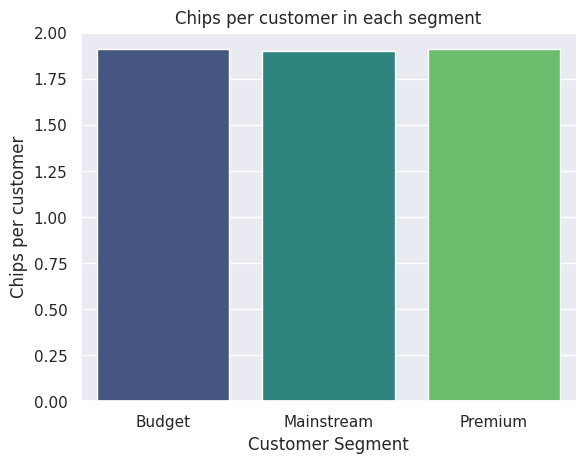

In [ ]:
cust_segment['chips_per_cust'] = round(cust_segment['PROD_QTY']/cust_segment['LYLTY_CARD_NBR'],2)

#Plotting number of chips per customer for each segment
sns.barplot(data=cust_segment, x='PREMIUM_CUSTOMER',y='chips_per_cust',palette='viridis')
plt.title('Chips per customer in each segment')
plt.xlabel('Customer Segment')
plt.ylabel('Chips per customer')

Chips per customer are nearly same in all three customer segment

Text(0.5, 1.0, 'Average chip price per customer segment')

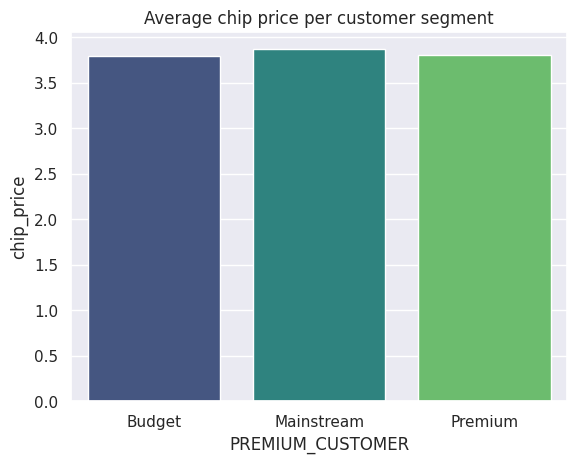

In [ ]:
#Checking average chip price per customer segment

df = cust_df.copy()

df['chip_price'] = round(df['TOT_SALES']/df['PROD_QTY'],2)

cust_seg3 = df.groupby('PREMIUM_CUSTOMER')['chip_price'].mean().reset_index()

#Plotting average chip price per customer segment
sns.barplot(data=cust_seg3, x='PREMIUM_CUSTOMER',y='chip_price',palette='viridis')
plt.title('Average chip price per customer segment')

In [ ]:
#Exporting this new df for future use
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/cust_data.csv'

cust_df.to_csv(file_path, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
